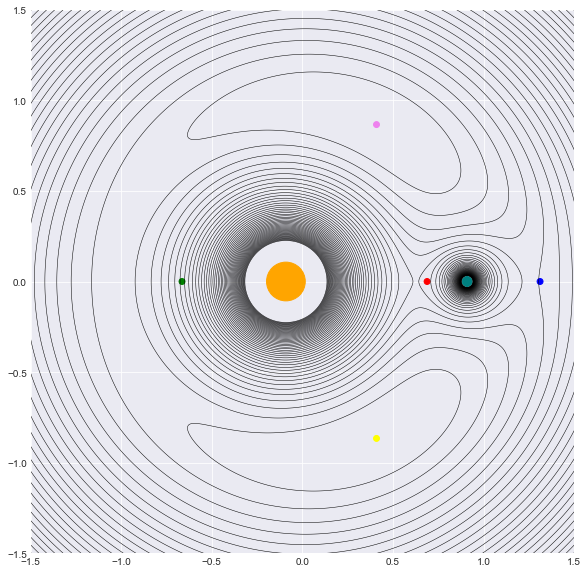

In [35]:
import numpy as np 
import matplotlib.pyplot as plt

def f(x, y, m1, m2, m3, d): 
    r1 = ((x+(m2*d/(m1+m2))) ** 2 + y ** 2)**0.5 
    r2 = ((x-(m1*d/(m1+m2))) ** 2 + y ** 2)**0.5 
    z = m1*m3/r1 + m2*m3/r2 + 0.5*m3*(m1+m2)*(x**2+y**2)/(d**3) 
    return z

m1 = 10 
m2 = 1 
m3 = 0.01 
r_mass = 1 #Distance between large masses

x = np.linspace(-r_mass-0.5, r_mass+0.5, 3000) 
y = np.linspace(-r_mass-0.5, r_mass+0.5, 3000)

X, Y = np.meshgrid(x, y) 
Potential = f(X, Y, m1, m2, m3, r_mass) 
Potential_max = Potential.max() 
Potential_min = Potential.min()

levels = np.linspace(Potential_min,Potential_max/350,50) 
plt.style.use("seaborn-darkgrid")#makes background dark 
fig,ax = plt.subplots(1,1) 
fig.set_size_inches(10, 10)
plt.gca().set_aspect("equal", adjustable="box")#scales axes

ax.contour(X,Y,Potential,levels=levels, colors = "black",linewidths=0.5) #Plots effective potential for reduced 3 body system

alpha = m2/(m1+m2)

x=np.array([r_mass*(1-(alpha/3)**(1/3)),r_mass*(1+(alpha/3)**(1/3)),-r_mass*(1-(5*alpha/12)**(1/3)),r_mass/2- m2*r_mass/(m1+m2),r_mass/2- m2*r_mass/(m1+m2),-m2*r_mass/(m1+m2),m1*r_mass/(m1+m2)])
y=np.array([0,0,0,r_mass*(3**0.5)/2,-r_mass*(3**0.5)/2,0,0])
c=np.array(["red","blue","green","violet","yellow","orange","teal"])
s=np.array([35,35,35,35,35,1500,100])

label=np.array(["L1","L2","L3","L4","L5"])

scatter=ax.scatter(x,y,c=c,s=s,label=label)
#ax.legend()

plt.show()

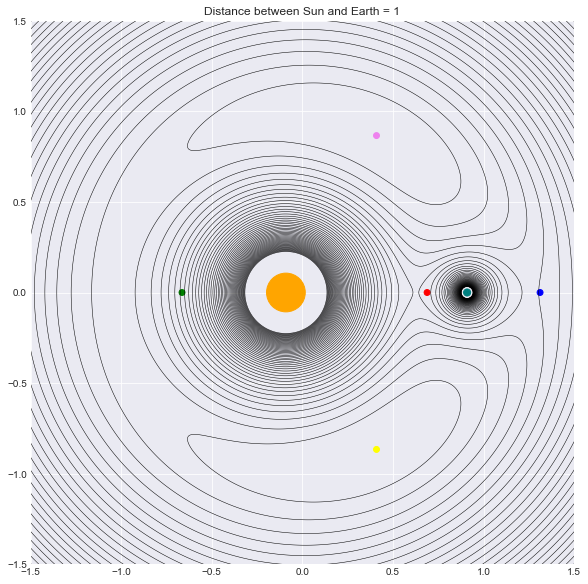

MovieWriter imagemagick unavailable; using Pillow instead.


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

def f(x, y, m1, m2, m3, d): 
    r1 = ((x+(m2*d/(m1+m2))) ** 2 + y ** 2)**0.5 
    r2 = ((x-(m1*d/(m1+m2))) ** 2 + y ** 2)**0.5 
    z = m1*m3/r1 + m2*m3/r2 + 0.5*m3*(m1+m2)*(x**2+y**2)/(d**3) 
    return z

m1 = 10 
m2 = 1 
m3 = 0.01 
r_mass = 1 #Distance between large masses

x = np.linspace(-r_mass-0.5, r_mass+0.5, 3000) 
y = np.linspace(-r_mass-0.5, r_mass+0.5, 3000)

X, Y = np.meshgrid(x, y) 
Potential = f(X, Y, m1, m2, m3, r_mass) 
Potential_max = Potential.max() 
Potential_min = Potential.min()

levels = np.linspace(Potential_min,Potential_max/350,50) 
plt.style.use("seaborn-darkgrid")#makes background dark 
fig,ax = plt.subplots(1,1) 
fig.set_size_inches(10, 10)
plt.gca().set_aspect("equal", adjustable="box")#scales axes

alpha = m2/(m1+m2)

cax=ax.contour(X,Y,Potential,levels=levels, colors = "black",linewidths=0.5) #Plots effective potential for reduced 3 body system

x=np.array([r_mass*(1-(alpha/3)**(1/3)),r_mass*(1+(alpha/3)**(1/3)),-r_mass*(1-(5*alpha/12)**(1/3)),r_mass/2- m2*r_mass/(m1+m2),r_mass/2- m2*r_mass/(m1+m2),-m2*r_mass/(m1+m2),m1*r_mass/(m1+m2)])
y=np.array([0,0,0,r_mass*(3**0.5)/2,-r_mass*(3**0.5)/2,0,0])
c=np.array(["red","blue","green","violet","yellow","orange","teal"])
s=np.array([35,35,35,35,35,1500,50])

label=np.array(["L1","L2","L3","L4","L5","Sun","Earth"])

scatter=ax.scatter(x,y,c=c,s=s,label=label)

plt.title("Distance between Sun and Earth = "+ str(r_mass))

plt.show()

def animate(i):
    r_mass = 1 - 0.01*i
    x = np.linspace(-r_mass-0.5, r_mass+0.5, 3000) 
    y = np.linspace(-r_mass-0.5, r_mass+0.5, 3000)

    X, Y = np.meshgrid(x, y) 
    Potential = f(X, Y, m1, m2, m3, r_mass) 
    ax.clear()
    #ax.clear()

    ax.contour(X,Y,Potential,levels=levels, colors = "black",linewidths=0.5) #Plots effective potential for reduced 3 body system
    x=np.array([r_mass*(1-(alpha/3)**(1/3)),r_mass*(1+(alpha/3)**(1/3)),-r_mass*(1-(5*alpha/12)**(1/3)),r_mass/2- m2*r_mass/(m1+m2),r_mass/2- m2*r_mass/(m1+m2),-m2*r_mass/(m1+m2),m1*r_mass/(m1+m2)])
    y=np.array([0,0,0,r_mass*(3**0.5)/2,-r_mass*(3**0.5)/2,0,0])

    scatter=ax.scatter(x,y,c=c,s=s,label=label)
    ax.set_title("Distance between Sun and Earth = "+ str(r_mass))
    plt.show()
    #plt.legend()
    

anim = animation.FuncAnimation(fig, animate, frames=15)
anim.save('contour.gif', writer='imagemagick', fps=1)
plt.show()
anim